In [7]:
!pip install --upgrade setuptools pip
!pip install --ignore-installed PyYAML
!pip install Pillow

!pip install nvidia-pyindex
!pip install --upgrade nvidia-tensorrt
!pip install pycuda

!pip install protobuf<4.21.3
!pip install onnxruntime-gpu
!pip install onnx>=1.9.0
!pip install onnx-simplifier>=0.3.6

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 kB 9.5 MB/s eta 0:00:00a 0:00:01
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/bin/bash: 4.21.3: No such file or directory
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [8]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0], sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0) 
Pytorch version: 1.13.1+cu117 


In [9]:
!nvidia-smi

Mon Jan  2 13:47:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   57C    P8    10W /  N/A |    303MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !# Download YOLOv7 code
# !git clone https://github.com/WongKinYiu/yolov7
# %cd yolov7
# !ls

In [ ]:
# !# Download trained weights
# !wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt

In [ ]:
# !python detect.py --weights ./yolov7-tiny.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg

In [ ]:
# from PIL import Image
# Image.open('/content/yolov7/runs/detect/exp/horses.jpg')

In [ ]:
# # export temporary ONNX model for TensorRT converter
# #--include-nms
# !python export.py --weights ./yolov7-tiny.pt --grid --end2end --simplify --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640
# !ls

In [10]:
!pip install nvidia-pyindex
!pip install onnx-graphsurgeon

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [21]:
%cd ~/Projects_DL/SignLanguage_YOLOv7/yolov7
!ls


/home/mrblack/Projects_DL/SignLanguage_YOLOv7/yolov7
American-Sign-Language-Letters-2  hubconf.py	    scripts
best.pt				  inference	    test.py
cfg				  LICENSE.md	    tools
data				  models	    traced_model.pt
deploy				  paper		    train_aux.py
detect.py			  __pycache__	    train.py
export.py			  README.md	    utils
export.zip			  requirements.txt  wandb
figure				  runs		    yolov7_training.pt


In [22]:
# export temporary ONNX model for TensorRT converter
#--include-nms
# %cd yolov7
!python export.py --weights ./best.pt --grid --end2end --simplify --topk-all 100 --iou-thres 0.65 --conf-thres 0.35 --img-size 640 640
!ls

Namespace(batch_size=1, conf_thres=0.35, device='cpu', dynamic=False, dynamic_batch=False, end2end=True, fp16=False, grid=True, img_size=[640, 640], include_nms=False, int8=False, iou_thres=0.65, max_wh=None, simplify=True, topk_all=100, weights='./best.pt')
YOLOR 🚀 v0.1-115-g072f76c torch 1.13.1+cu117 CPU

Fusing layers... 
IDetect.fuse
Model Summary: 208 layers, 6075246 parameters, 0 gradients
/home/mrblack/pyenvs/venv_signLanguage/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

Starting TorchScript export with torch 1.13.1+cu117...
/home/mrblack/Projects_DL/SignLanguage_YOLOv7/yolov7/models/yolo.py:150: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python

In [13]:
# Download ONNX to TensorRT converter
%cd ../
# !git clone https://github.com/Linaom1214/tensorrt-python.git

/home/mrblack/Projects_DL


In [23]:
%cd ~/Projects_DL/SignLanguage_YOLOv7/tensorrt-python
!ls
!pwd

/home/mrblack/Projects_DL/SignLanguage_YOLOv7/tensorrt-python
cpp		export.py	__pycache__   README.md  trt.py
Examples.ipynb	image_batch.py	README_CN.md  src	 utils
/home/mrblack/Projects_DL/SignLanguage_YOLOv7/tensorrt-python


In [24]:
!python export.py -o ~/Projects_DL/SignLanguage_YOLOv7//yolov7/best.onnx -e ./best.trt -p fp16

Namespace(calib_batch_size=8, calib_cache='./calibration.cache', calib_input=None, calib_num_images=5000, conf_thres=0.4, end2end=False, engine='./best.trt', iou_thres=0.5, max_det=100, onnx='/home/mrblack/Projects_DL/SignLanguage_YOLOv7//yolov7/best.onnx', precision='fp16', verbose=False, workspace=1)
[01/02/2023-13:53:28] [TRT] [I] [MemUsageChange] Init CUDA: CPU +320, GPU +0, now: CPU 343, GPU 593 (MiB)
[01/02/2023-13:53:33] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +79, GPU +0, now: CPU 441, GPU 593 (MiB)
[01/02/2023-13:53:33] [TRT] [W] onnx2trt_utils.cpp:369: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[01/02/2023-13:53:33] [TRT] [W] onnx2trt_utils.cpp:395: One or more weights outside the range of INT32 was clamped
[01/02/2023-13:53:33] [TRT] [I] No importer registered for op: EfficientNMS_TRT. Attempting to import as plugin.
[01/02/2023-13:53:33] [TRT] [I] Searching for 

In [12]:
# Export TensorRT-engine model 
!python export.py -o /content/yolov7/yolov7-tiny.onnx -e ./yolov7-tiny-nms.trt -p fp16

Namespace(calib_batch_size=8, calib_cache='./calibration.cache', calib_input=None, calib_num_images=5000, conf_thres=0.4, end2end=False, engine='./yolov7-tiny-nms.trt', iou_thres=0.5, max_det=100, onnx='/content/yolov7/yolov7-tiny.onnx', precision='fp16', verbose=False, workspace=1)
[01/02/2023-10:33:30] [TRT] [I] [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 0, GPU 244 (MiB)
[01/02/2023-10:33:32] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +0, GPU +68, now: CPU 0, GPU 312 (MiB)
[01/02/2023-10:33:32] [TRT] [W] onnx2trt_utils.cpp:369: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[01/02/2023-10:33:32] [TRT] [W] onnx2trt_utils.cpp:395: One or more weights outside the range of INT32 was clamped
[01/02/2023-10:33:33] [TRT] [I] No importer registered for op: EfficientNMS_TRT. Attempting to import as plugin.
[01/02/2023-10:33:33] [TRT] [I] Searching for plugin: EfficientNMS_TRT, 

In [1]:
import cv2
import torch
import random
import time
import numpy as np
import tensorrt as trt
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple

/home/mrblack/pyenvs/venv_signLanguage/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# w = './yolov7-tiny-nms.trt'
# device = torch.device('cuda:0')
# img = cv2.imread('/content/yolov7/inference/images/horses.jpg')

In [3]:
w = './best.trt'
device = torch.device('cuda:0')
img = cv2.imread('~/Libraries/SignLanguage_YOLOv7/test.jpeg')

[ WARN:0@152.756] global loadsave.cpp:244 findDecoder imread_('~/Libraries/SignLanguage_YOLOv7/test.jpeg'): can't open/read file: check file path/integrity


In [4]:
# Infer TensorRT Engine
Binding = namedtuple('Binding', ('name', 'dtype', 'shape', 'data', 'ptr'))
logger = trt.Logger(trt.Logger.INFO)
trt.init_libnvinfer_plugins(logger, namespace="")
with open(w, 'rb') as f, trt.Runtime(logger) as runtime:
    model = runtime.deserialize_cuda_engine(f.read())
bindings = OrderedDict()
for index in range(model.num_bindings):
    name = model.get_binding_name(index)
    dtype = trt.nptype(model.get_binding_dtype(index))
    shape = tuple(model.get_binding_shape(index))
    data = torch.from_numpy(np.empty(shape, dtype=np.dtype(dtype))).to(device)
    bindings[name] = Binding(name, dtype, shape, data, int(data.data_ptr()))
binding_addrs = OrderedDict((n, d.ptr) for n, d in bindings.items())
context = model.create_execution_context()


def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

def postprocess(boxes,r,dwdh):
    dwdh = torch.tensor(dwdh*2).to(boxes.device)
    boxes -= dwdh
    boxes /= r
    return boxes

names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 
         'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 
         'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 
         'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 
         'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
         'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 
         'hair drier', 'toothbrush']
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

[01/02/2023-13:15:58] [TRT] [I] [MemUsageChange] Init CUDA: CPU +330, GPU +0, now: CPU 430, GPU 303 (MiB)
[01/02/2023-13:15:58] [TRT] [I] Loaded engine size: 13 MiB
[01/02/2023-13:15:58] [TRT] [E] 6: The engine plan file is not compatible with this version of TensorRT, expecting library version 8.4.1.5 got 8.4.3.1, please rebuild.
[01/02/2023-13:15:58] [TRT] [E] 4: [runtime.cpp::deserializeCudaEngine::50] Error Code 4: Internal Error (Engine deserialization failed.)


AttributeError: 'NoneType' object has no attribute 'num_bindings'

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = img.copy()
image, ratio, dwdh = letterbox(image, auto=False)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, 0)
image = np.ascontiguousarray(image)

im = image.astype(np.float32)
im.shape

error: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Cost 0.003994853000222065 s


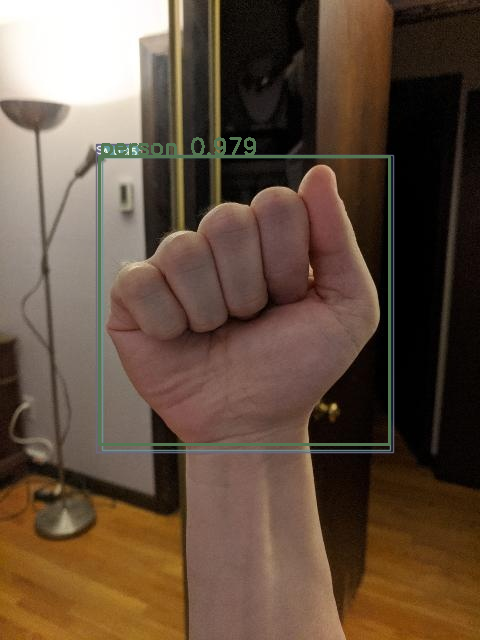

In [42]:
im = torch.from_numpy(im).to(device)
im/=255
im.shape

# warmup for 10 times
for _ in range(10):
    tmp = torch.randn(1,3,640,640).to(device)
    binding_addrs['images'] = int(tmp.data_ptr())
    context.execute_v2(list(binding_addrs.values()))

start = time.perf_counter()
binding_addrs['images'] = int(im.data_ptr())
context.execute_v2(list(binding_addrs.values()))
print(f'Cost {time.perf_counter()-start} s')

nums = bindings['num_dets'].data
boxes = bindings['det_boxes'].data
scores = bindings['det_scores'].data
classes = bindings['det_classes'].data
nums.shape,boxes.shape,scores.shape,classes.shape

boxes = boxes[0,:nums[0][0]]
scores = scores[0,:nums[0][0]]
classes = classes[0,:nums[0][0]]

for box,score,cl in zip(boxes,scores,classes):
    box = postprocess(box,ratio,dwdh).round().int()
    name = names[cl]
    color = colors[name]
    name += ' ' + str(round(float(score),3))
    cv2.rectangle(img,box[:2].tolist(),box[2:].tolist(),color,2)
    cv2.putText(img,name,(int(box[0]), int(box[1]) - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,color,thickness=2)

Image.fromarray(img)